**Jeremy Beard

**Due 20220313

**Week 1

**MSDS650

**Genie Hays

<img align="right" style="padding-right:10px;" src="figures_wk1/answering_questions.png" width=350><br>
# Week 1 Lab: Data Analytics - Answering Questions

As noted in our lecture notebook this week, the main purpose of data analytics is to answer questions about a dataset. This week you will practice developing questions about a dataset and then answer those questions using python's Pandas library.

##  Our Dataset
**Dataset Name::** Movie Lens dataset
GroupLens Research has collected and made available rating data sets from the MovieLens web site (https://movielens.org). 
The dataset is comprised of 3 seperate files: movies.dat, ratings.dat, users.dat.


Reminder: The first step in any type of data analysis is to <u>look</u> at your data.

In [1]:
#I included these cells for complete-ness, but since I am on a Windows machine, 'head' doesn't work. 
#I looked at each set of data in my local text editor though, Notepad++
!head assign_wk1/movies.dat

'head' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
#I included these cells for complete-ness, but since I am on a Windows machine, 'head' doesn't work. 
#I looked at each set of data in my local text editor though, Notepad++
!head assign_wk1/ratings.dat

'head' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
#I included these cells for complete-ness, but since I am on a Windows machine, 'head' doesn't work. 
#I looked at each set of data in my local text editor though, Notepad++
!head assign_wk1/users.dat

'head' is not recognized as an internal or external command,
operable program or batch file.


Hmmm.... Well it appears that all 3 of our data files do not include a header row.  So we are going to need to define a header row for each of the 3 files. The accompanying README file denotes the fileds for each of these files. 

<div class="alert alert-block alert-info">
    <b>File Separator::</b> Did you notice that seperator in the file is not a comma?  We will need to account for that when we load each file into a Pandas dataframe. <br> <br>
The README file has additional useful information that you might want to refer while working on this assignment.
</div>

# I. Introduction
In this week's assignment, the movies datasets from the Lab this week were used and expanded upon. In addition to the operations which were performed in the lab (below), additional questions are asked of the dataset. 

# II. Methods, III. Code, and IV. Analysis of Results
Let's begin with just the steps from the lab. The movies dataset is loaded, including the option of the separator being the semicolon. Display some info about the data and the first 10 rows of the data.

In [4]:
import pandas as pd

In [5]:
# movie.dat fields --> MovieID::Title::Genres

m_cols = ['movie_id', 'title', 'genres']
movies_df = pd.read_csv('assign_wk1/movies.dat', sep=';', names=m_cols, encoding='latin1')
movies_df.info()
movies_df.head(10)

##My movies.dat text file had a weird error at line 3845: And God Created Women. 
##I had to correct it for pandas to correctly recognize only 3 columns of data
##I used the function below to find the error
#movies_df[movies_df['nan'].notnull()]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


Now that we've loaded the movies.dat dataframe which gives a movie id and the titles and genres of movies, we will now load the next dataframe. This will be the ratings.dat dataframe which gives a user_id, a movie_id, a rating, and a timestamp.

In [6]:
# ratings.dat fields --> UserID::MovieID::Rating::Timestamp
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_df = pd.read_csv('assign_wk1/ratings.dat', sep=';', names=r_cols)
ratings_df.head(10)


,user_id,movie_id,rating,unix_timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


Finally, we have our third dataframe to load. This is the users.dat dataframe which gives information about the users such as age and sex. These three dataframes will eventually be merged together. Let's see how.

In [7]:
# users.dat fields --> UserID::Gender::Age::Occupation::Zip-code
u_cols = ['user_id', 'sex', 'age', 'occupation', 'zip_code']
users_df = pd.read_csv('assign_wk1/users.dat', sep=';', names=u_cols)
users_df.head(10)

,user_id,sex,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


Now we can merge the individal dataframes into a single dataframe. This will link the dataframes based on movie_id and user_id as those columns are present in multiple dataframes.

In [8]:
# merge movies_df with ratings_df
movie_ratings_df = pd.merge(movies_df, ratings_df)

# now movies_ratings_df with users_df
lens_df = pd.merge(movie_ratings_df, users_df)
lens_df.head(20)

,movie_id,title,genres,user_id,rating,unix_timestamp,sex,age,occupation,zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
5,531,"Secret Garden, The (1993)",Children's|Drama,1,4,978302149,F,1,10,48067
6,588,Aladdin (1992),Animation|Children's|Comedy|Musical,1,4,978824268,F,1,10,48067
7,594,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,1,4,978302268,F,1,10,48067
8,595,Beauty and the Beast (1991),Animation|Children's|Musical,1,5,978824268,F,1,10,48067
9,608,Fargo (1996),Crime|Drama|Thriller,1,4,978301398,F,1,10,48067


Now, to learn about our data a little more, a few simple descriptive functions are called to show some metadata. The info() and describe() functions, as well as some simple statistics are used to give information about the data as a whole.

In [9]:
lens_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   movie_id        1000209 non-null  int64 
 1   title           1000209 non-null  object
 2   genres          1000209 non-null  object
 3   user_id         1000209 non-null  int64 
 4   rating          1000209 non-null  int64 
 5   unix_timestamp  1000209 non-null  int64 
 6   sex             1000209 non-null  object
 7   age             1000209 non-null  int64 
 8   occupation      1000209 non-null  int64 
 9   zip_code        1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [10]:
lens_df.describe()

,movie_id,user_id,rating,unix_timestamp,age,occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.024512e+03,3.581564e+00,9.722437e+08,2.973831e+01,8.036138e+00
std,1.096041e+03,1.728413e+03,1.117102e+00,1.215256e+07,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00,0.000000e+00
25%,1.030000e+03,1.506000e+03,3.000000e+00,9.653026e+08,2.500000e+01,2.000000e+00
50%,1.835000e+03,3.070000e+03,4.000000e+00,9.730180e+08,2.500000e+01,7.000000e+00
75%,2.770000e+03,4.476000e+03,4.000000e+00,9.752209e+08,3.500000e+01,1.400000e+01
max,3.952000e+03,6.040000e+03,5.000000e+00,1.046455e+09,5.600000e+01,2.000000e+01


In [11]:
lens_df.shape

(1000209, 10)

#### Related Homework Assignment Questions
1) Above, I demostrated using a info() and shape functions with our lens_df data structure.

* Describe what both of these functions are used for?

    The 'info()' and 'shape()' functions each have their own use in data analytics. The 'info()' function displays a set of metainfo about the dataframe in question. The 'info()' function displays each column of the dataframe as well as a count of non-null values and a description of the type of data each column contains. The 'shape()' function is much more simple and returns a tuple of the size of the dataframe.
    
* What information is returned from these functions?

    The 'info()' function returns a description of the dataframe object including a count of the non-null values of each column of the dataframe, as well as the type of data contains in each column of the dataframe.
    The 'shape()' function returns a tuple of the size of the dataframe object.
    
* Why is this information helpful?

    This information is helpful because it gives the user a sense of what they are looking at. Both the 'shape()' and 'info() functions give the user some metadata about the dataframe. If the user is observant, in some cases he or she can also find the shape of the data within the 'info()' function, as it gives a count of the columns and rows. 

In [12]:
lens_df['rating'].agg( ['sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'mad', 'prod'] )

sum       3.582313e+06
mean      3.581564e+00
median    4.000000e+00
min       1.000000e+00
max       5.000000e+00
std       1.117102e+00
var       1.247917e+00
mad       9.338609e-01
prod      0.000000e+00
Name: rating, dtype: float64

Now we want to find out a little about each individual movie itself. This is done by using the 'groupby' function to group the data by the title of each movie. I wanted to compute the average rating of each movie in the list, so I computed the mean rating of each movie and displayed it. This is to answer the question in the homework of "which movies have the highest average rating?" This question is not answered yet, but we are on our way.

In [13]:
# this cell finds the average rating of the movies in this list 
df_title_ratings = lens_df.groupby(["title"])['rating'].mean()

print(df_title_ratings)

title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: rating, Length: 3706, dtype: float64


Now we need to sort the values to find the highest rated movies. However, you can see that the top choices have a rating of 5.0 exactly. This can tell us that the sample size of this movie is very small, and may not be representative of the larger population. To offset this, later in the assignment, I take only movies which have 10 ratings or more. This will give more realistic answers.

In [14]:
## this line answers the questions "What movies have the highest average rating from the data?"
print(df_title_ratings.reset_index().sort_values(['rating'], ascending=False).set_index(['rating']).head(10))

                                            title
rating                                           
5.0                       Ulysses (Ulisse) (1954)
5.0                                  Lured (1947)
5.0                       Follow the Bitch (1998)
5.0                      Bittersweet Motel (2000)
5.0                        Song of Freedom (1936)
5.0                      One Little Indian (1973)
5.0                          Smashing Time (1967)
5.0     Schlafes Bruder (Brother of Sleep) (1995)
5.0            Gate of Heavenly Peace, The (1995)
5.0                              Baby, The (1973)


In [15]:
## this line answers the questions "What movies have the lowest average rating from the data?"
print(df_title_ratings.reset_index().sort_values(['rating'], ascending=True).set_index(['rating']).head(10))

                                                    title
rating                                                   
1.0                                Elstree Calling (1930)
1.0                                    Get Over It (1996)
1.0                                  Venice/Venice (1992)
1.0                                        Windows (1980)
1.0                    Kestrel's Eye (Falkens öga) (1998)
1.0                                McCullochs, The (1975)
1.0                                      Sleepover (1995)
1.0     Torso (Corpi Presentano Tracce di Violenza Car...
1.0           Spring Fever USA (a.k.a. Lauderdale) (1989)
1.0                             Santa with Muscles (1996)


Next, I wanted to answer the question "what are the most watched movies?" I did this by using the pivot_table command and agreggating the number of times each title is found in the data. I then sorted the data and found that the most watched movie in this dataset is "American Beauty". You can see the other top-watched movies below.

In [16]:
#The following finds the most-watched movies by grouping them by title and sorting
count_movies = lens_df.pivot_table(columns=['title'], aggfunc='size').sort_values(ascending=False)
#NOTE: I used the following link for learning to count duplicates: 
#https://datatofish.com/count-duplicates-pandas/
print (count_movies.head(10))

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
dtype: int64


In [17]:
#The following finds the least-watched movies by grouping them by title and sorting
count_movies = lens_df.pivot_table(columns=['title'], aggfunc='size').sort_values(ascending=True)
print (count_movies.head(10))

title
Another Man's Poison (1952)                                              1
Night Tide (1961)                                                        1
Shadows (Cienie) (1988)                                                  1
McCullochs, The (1975)                                                   1
Anna (1996)                                                              1
Target (1995)                                                            1
Even Dwarfs Started Small (Auch Zwerge haben klein angefangen) (1971)    1
Tashunga (1995)                                                          1
Waltzes from Vienna (1933)                                               1
Open Season (1996)                                                       1
dtype: int64


Next, I wanted to answer the question "Which users have rated the most movies?" This will show us who really is the true movie buff or not. I used the same pivot_table command to group the data by user_id. Then I sorted the data and displayed it. User 4169 has watched and rated over 2300 movies!!! That is a lot of movies for sure. 

In [18]:
# this cell answers the question "which users have rated the most movies?"
count_users = lens_df.pivot_table(columns=['user_id'], aggfunc='size').sort_values(ascending=False)
print(count_users.head(10))

user_id
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
889     1518
3618    1344
2063    1323
1150    1302
1015    1286
dtype: int64


Finally, in the next cell, we export the merged data so we have it stored somewhere. 

In [19]:
lens_df.to_csv('movie_lens_merged.csv',index=False)

#### Related Homework Assignment Questions

From the above cells, I've answered the questions below:

2) Using the functions demonstrated in `1_Data_Analytics_Pandas_Basics.ipynb` answer the following questions:

    * Which movie(s) has the highest average rating? 
    
        To get a more accurate picture of the highest "average" rating, there needs to first be an average. To do this, I excluded any movies with less than 10 ratings. After doing that, I found the highest rated movies to be:
        **I am Cuba
        **Lamerica
        **Apple, The (Sib)
        **Sanjuro
        **Seven Samurai (The Magnificent Seven)
        **Shawshank Redemption, The
        **Godfather, The
        **Close Shave, A
        **Usual Suspects, The
        **Schindler's List
        
    * What about the movie(s) with the lowest rating?
    
        Doing the same as with the question above, I excluded any movies with less than 10 ratings. Doing that, I found the movies with the lowest ratings were:
        
        **Santa with Muscles
        **Carnosaur 3: Primal Species
        **Slaughterhouse 2
        **Brenda Starr
        **Time Tracers
        **Turbo: A Power Rangers Movie
        **3 Ninjas: High Noon on Mega Mountain
        **Amityville 3-D
        **Carnosaur 2
        **Prom Night III: The Last Kiss
        
    * Which movie(s) has the most ratings in our dataset?
    
        I found the movies with the most ratings in the dataset to be:
        
        **American Beauty (1999)                                   2482
        **Star Wars: Episode IV - A New Hope (1977)                2344
        **Star Wars: Episode V - The Empire Strikes Back (1980)    2342
        **Star Wars: Episode VI - Return of the Jedi (1983)        2230
        **Terminator 2: Judgment Day (1991)                        2193
        **Jurassic Park (1993)                                     2099
        **Saving Private Ryan (1998)                               2078
        **Matrix, The (1999)                                       2076
        **Men in Black (1997)                                      2000
        **Back to the Future (1985)                                1944
        
    * List the 10 users who have rated the most movies?
    
        The users who have rated the most movies are:
        
        **user_id count
        **4169    2314
        **1680    1850
        **4277    1743
        **1941    1595
        **1181    1521
        **889     1518
        **3618    1344
        **2063    1323
        **1150    1302
        **1015    1286

One major part of the homework assignment this week is to ask 5 questions of the data, and go about answering them using the functions from the week 1 reading. I found myself asking the following questions of the data:
#### 1. What is the general tendency for rating across all users?
#### 2. Who rates movies higher, women or men?
#### 3. Who watches more movies, males or females?
#### 4. What are the top 10 most watched movies for males? What about females?
#### 5. What are the top 10 least watched movies for females and males?
#### 6. Drop any movies that were rated less than 10 times, and compute some facts about the remaining data
#### 7. What are the relative ages of all these movie-watchers? Use a box plot

The first question I set to answer was "What is the general tendency for rating across all users? I used a histogram to answer this question visually as the histogram shows the general shape of the data. Most users seem to give their movies a 4 rating it looks like!

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

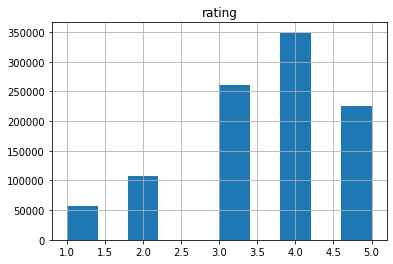

In [20]:
# Questions I want to answer:
# 1. What is the general tendency for rating across all users?
lens_df.hist(column='rating')

The next question I wanted to answer was: who rates movies higher, men or women? I found that they were pretty equal! From the cell below, it seems like women tended to rate movies a tad more favorably than men, but overall the average rating of movies for men vs. women were about the same value.

In [21]:
# 2. Who rates movies higher, women or men?
#df_title_ratings = lens_df.groupby(["title"])['rating'].mean()
df_male_ratings = lens_df.groupby(['sex'])['rating'].mean()
print(df_male_ratings)


sex
F    3.620366
M    3.568879
Name: rating, dtype: float64


Next, to continue with the male-female rabbit hole, I wanted to answer the questions "who watched more movies, males or females?" From the cell below, it appears that males watch more than 3x the amount of movies that females do!! Or at least they felt compelled to provide a rating 3x more frequently for the movies they watched. That drastic difference was shocking to me. I don't know what I was expecting, but it wasn't that.

In [22]:
# 3. Who watches more movies, males or females?
lens_df.pivot_table(columns=['sex'], aggfunc='size').sort_values(ascending=False)


sex
M    753769
F    246440
dtype: int64

Next, I wanted to split the dataframe into an entirely male dataframe, and an entirely female dataframe. I used the 'loc' function to achieve this, combined with a boolean argument of ['sex'] == 'M' or ['sex'] == 'F'. I wanted to see what the top 10 most watched movies for males and females were. I used the similar pivot_table function to achieve this. You can see the result below. Both males and females watched and rated "American Beauty" the most!

In [23]:
# 4. What are the top 10 most watched movies for males?
df_males = lens_df.loc[(lens_df['sex'] == 'M')]
df_females = lens_df.loc[(lens_df['sex'] == 'F')]
#NOTE: I used this website for only choosing rows with a certain column value (in this case, 'M' or 'F')
#https://www.statology.org/pandas-select-rows-based-on-column-values/
print('Males Most Watched Movies')
print(df_males.pivot_table(columns=['title'], aggfunc='size').sort_values(ascending=False).head(10))


#    What are the top 10 most watched movies for females?
print('\nFemales Most Watched Movies')
print(df_females.pivot_table(columns=['title'], aggfunc='size').sort_values(ascending=False).head(10))

Males Most Watched Movies
title
American Beauty (1999)                                   2482
Star Wars: Episode IV - A New Hope (1977)                2344
Star Wars: Episode V - The Empire Strikes Back (1980)    2342
Star Wars: Episode VI - Return of the Jedi (1983)        2230
Terminator 2: Judgment Day (1991)                        2193
Jurassic Park (1993)                                     2099
Saving Private Ryan (1998)                               2078
Matrix, The (1999)                                       2076
Men in Black (1997)                                      2000
Back to the Future (1985)                                1944
dtype: int64

Females Most Watched Movies
title
American Beauty (1999)                                   946
Shakespeare in Love (1998)                               798
Silence of the Lambs, The (1991)                         706
Sixth Sense, The (1999)                                  664
Groundhog Day (1993)                                    

Along the same vein, I wanted to find the least watched movies for males and females. This was achieved easily using the same functions but sorting them in 'ascending' order instead of descending.

In [24]:
# 5. What are the top 10 least watched movies for females and males?
print('Males Least Watched Movies')
print(df_males.pivot_table(columns=['title'], aggfunc='size').sort_values(ascending=True).head(10))

print('\nFemales Least Watched Movies')
print(df_females.pivot_table(columns=['title'], aggfunc='size').sort_values(ascending=True).head(10))

Males Least Watched Movies
title
Beauty (1998)                                                            1
Somewhere in the City (1997)                                             1
Fantastic Night, The (La Nuit Fantastique) (1949)                        1
Sonic Outlaws (1995)                                                     1
Bat Whispers, The (1930)                                                 1
Uninvited Guest, An (2000)                                               1
Last Time I Saw Paris, The (1954)                                        1
Last of the High Kings, The (a.k.a. Summer Fling) (1996)                 1
Coming Apart (1969)                                                      1
Even Dwarfs Started Small (Auch Zwerge haben klein angefangen) (1971)    1
dtype: int64

Females Least Watched Movies
title
Big Combo, The (1955)                  1
Ogre, The (Der Unhold) (1996)          1
Bittersweet Motel (2000)               1
Cheetah (1989)                         1
I Am

Finally, below is what I alluded to in the sections above. I found that the highest average ratings were not telling of the overall population because they seemed to have '5.0' exactly, where I would expect some variance from a perfect 5.0 score, if the sample size is adequately high. Therefore, I chose to remove any movies which had less than 10 ratings by users. I found much more satisfying average ratings. Please see below.

In [25]:
# 6. Drop any movies that were rated less than 10 times, 
#    and compute some facts about the remaining data
common_movies = lens_df.groupby('title').filter(lambda x: x['rating'].count() >= 5)
df_common_titles = common_movies.groupby(["title"])['rating'].mean()
print(df_common_titles)

title
$1,000,000 Duck (1971)               3.027027
'Night Mother (1986)                 3.371429
'Til There Was You (1997)            2.692308
'burbs, The (1989)                   2.910891
...And Justice for All (1979)        3.713568
                                       ...   
Your Friends and Neighbors (1998)    3.376147
Zed & Two Noughts, A (1985)          3.413793
Zero Effect (1998)                   3.750831
Zeus and Roxanne (1997)              2.521739
eXistenZ (1999)                      3.256098
Name: rating, Length: 3416, dtype: float64


In [26]:
#These are the top 10 movies from 10 or more users
print(df_common_titles.reset_index().sort_values(['rating'], ascending=False).set_index(['rating']).head(10))

                                                      title
rating                                                     
4.800000                I Am Cuba (Soy Cuba/Ya Kuba) (1964)
4.750000                                    Lamerica (1994)
4.666667                            Apple, The (Sib) (1998)
4.608696                                     Sanjuro (1962)
4.560510  Seven Samurai (The Magnificent Seven) (Shichin...
4.554558                   Shawshank Redemption, The (1994)
4.524966                              Godfather, The (1972)
4.520548                              Close Shave, A (1995)
4.517106                         Usual Suspects, The (1995)
4.510417                            Schindler's List (1993)


In [27]:
#These are the least liked 10 movies from 10 or more users
print(df_common_titles.reset_index().sort_values(['rating'], ascending=True).set_index(['rating']).head(10))

                                                title
rating                                               
1.000000                    Santa with Muscles (1996)
1.058824           Carnosaur 3: Primal Species (1996)
1.142857                      Slaughterhouse 2 (1988)
1.166667                          Brenda Starr (1989)
1.285714                          Time Tracers (1995)
1.318182          Turbo: A Power Rangers Movie (1997)
1.361702  3 Ninjas: High Noon On Mega Mountain (1998)
1.372093                        Amityville 3-D (1983)
1.461538                           Carnosaur 2 (1995)
1.466667         Prom Night III: The Last Kiss (1989)


Finlly, I wanted to explore the ages of the users involved in this dataset. I created a boxplot based on the age of the user which submitted the rating. You can see the data centers around age 30, with a 25% quartile of 25 and a 75% quartile of 35. 

<AxesSubplot:>

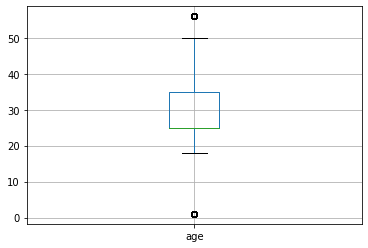

In [28]:
# 7. What are the relative ages of all these movie-watchers? Use a box plot
lens_df.boxplot('age')

# V. Conclusion
This assignment brought me back to pandas and got me working with data again! It's been fun to see the different statistics, and come up with my own questions that I can answer. I found I was more interested in the questions since I came up with them, and found it interesting that males and females were similar in their overall average ratings, but vastly different in the quantity of ratings they each provided. Males were much more likely to have a rating in this database. 

Please let me know if you have any questions! Thank you.
All the best,
Jeremy

# VI. References
MSDS 650 - Week 1 Content:

1.) Class datasets provided for this assignment: ratings.csv, movies.csv, users.csv

2.) From the Experts PDF: Week 1

3.) Week 2 Assignment Lab (Jupyter Notebook)

4.) https://www.statology.org/pandas-select-rows-based-on-column-values/
    
5.) https://datatofish.com/count-duplicates-pandas/

# Deliverables
Upload your Jupyter Notebook to the corresponding location in WorldClass. 

**Note::** Make sure you have clearly indicated each assignment requirement within your notebook. Also, I <u><i><b>highly encourage</b></i></u> you to use markdown text to create a notebook that integrates your analysis within your code. Refer to the GettingStarted notebook to understand the difference between markdown text and comments.